In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

$I_{min} + \frac{(I_{max} - I_{min})}{1 + e^{(T_m - T)/slope}}$

In [2]:
def Tm_model(T, I0, I1, Tm, slope):
    return I0 + (I1 - I0)/(1 + np.exp( (Tm-T)/slope) )

def Tm_model_scaled(T, Tm, slope):
    return  1/(1 + np.exp( (Tm-T)/slope) )

In [3]:
df = pd.read_excel('data.xlsx')

65.08974938407997


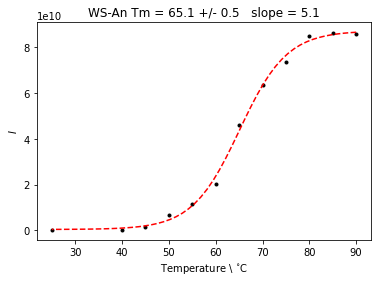

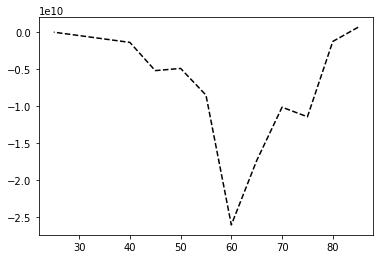

62.916141460759235


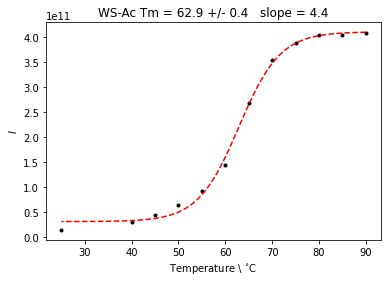

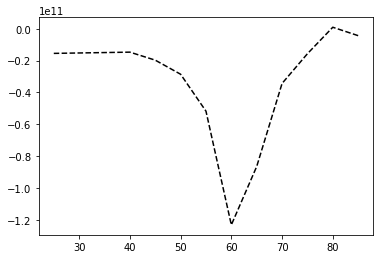

60.62795361784517


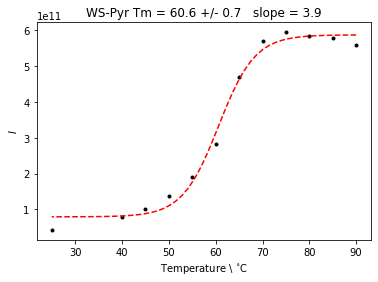

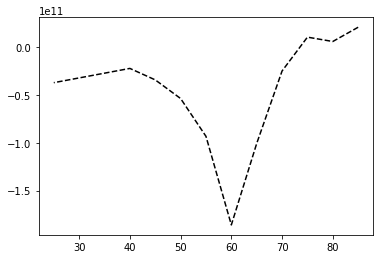

MS9-An failed.


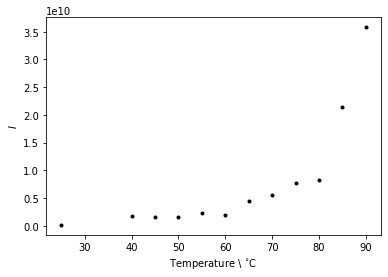

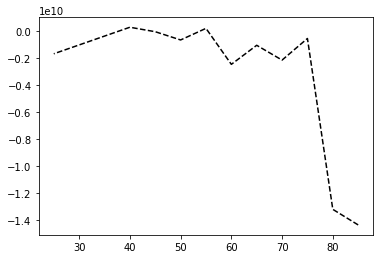

MS9-Ac failed.


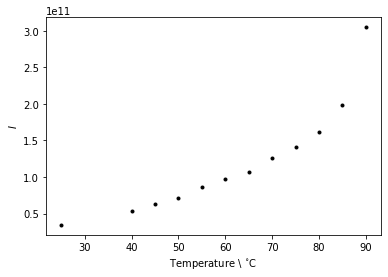

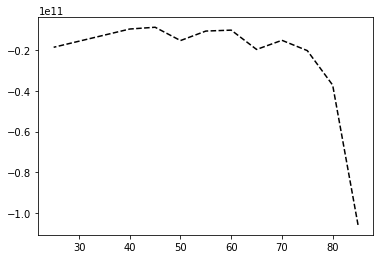

61.53238459703652


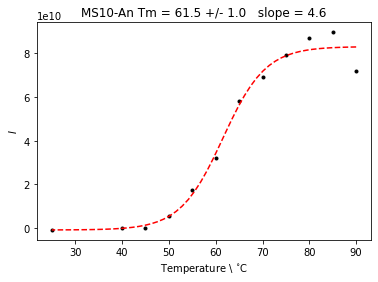

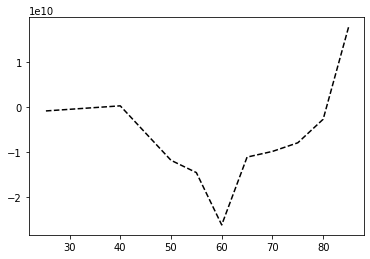

53.46939978142318


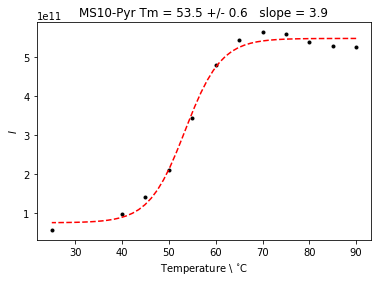

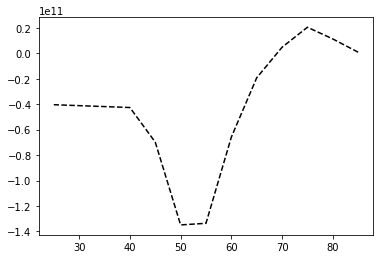

81.43171908605952


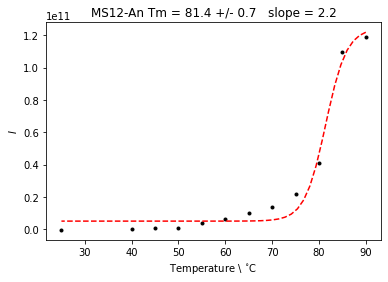

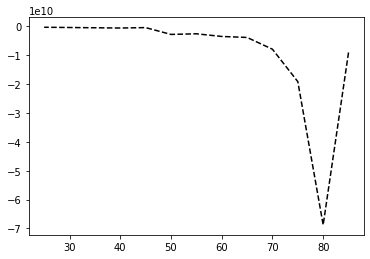

In [4]:
x = df['Temp']
x_model = np.linspace(x.values[0], x.values[-1], num=50)
for c in df.columns[1:]:
    y = df[c]
    try:
        plt.plot(x,y, 'k.')
        guesses = [y.min(), y.max(), 60, 1.0]
        popt, pcov = curve_fit(Tm_model, x, y, p0 = guesses)
        perr = np.sqrt(np.diag(pcov))
        print(popt[2])
        plt.plot(x_model, Tm_model(x_model, *popt), 'r--')
        plt.title('{} Tm = {:.1f} +/- {:.1f}   slope = {:.1f}'.format(c, popt[2], perr[2], popt[3]))
        plt.xlabel('Temperature \ $^{\circ}$C ')
        plt.ylabel('$I$')
        plt.show()
    except:
        print(c, 'failed.')
        plt.xlabel('Temperature \ $^{\circ}$C ')
        plt.ylabel('$I$')
        plt.show()
        
    plt.plot(x[1:], np.diff(y.values), 'k--')
    plt.show()



In [5]:
import matplotlib


empty_table = {'col1':[], 'col2': []}
new_table = []
new_table_2 = []
Dataframe_1 = pd.DataFrame()


'''for c in df.columns[1:]:
    y = df[c]
    try:    
        guesses = [y.min(), y.max(), 60, 1.0]
        popt, pcov = curve_fit(Tm_model, x, y, p0 = guesses)
        print(c, popt[2])
        new_table.append(popt[2])
        new_table_2.append(c)
    except:
        print(c, 'failed.')'''

new_table
dataframe_2 = Dataframe_1.assign(Variants=new_table_2, Tm=new_table)
#print(dataframe_2)
#dataframe_2.to_excel(r'C:\Users\krist\OneDrive - NTNU\Documents\Masterforslag\Analysis Tm\Melting temperatures.xlsx', index = False)

#dataframe_2.plot.bar(x='Variants', y='Tm')
    

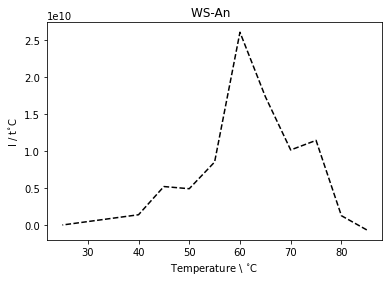

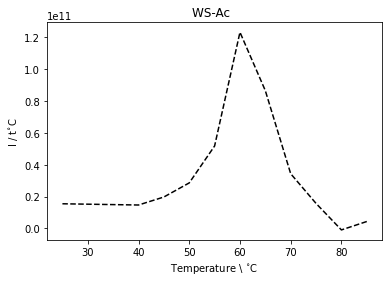

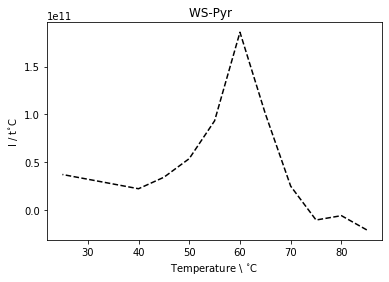

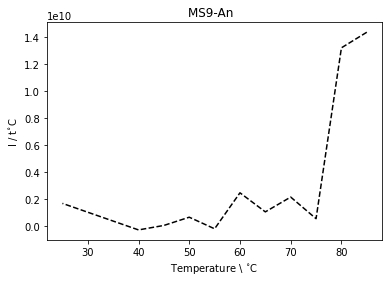

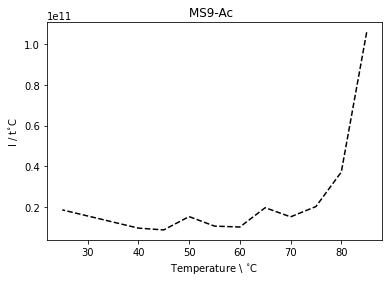

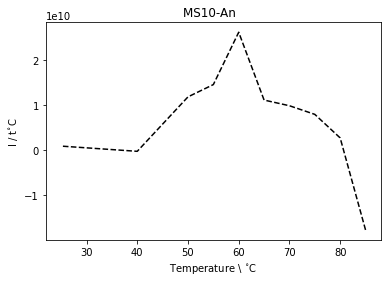

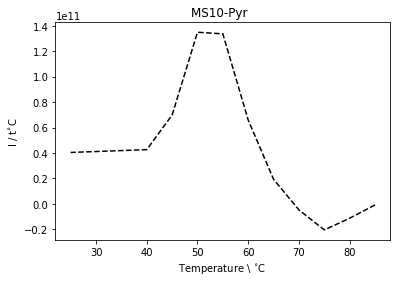

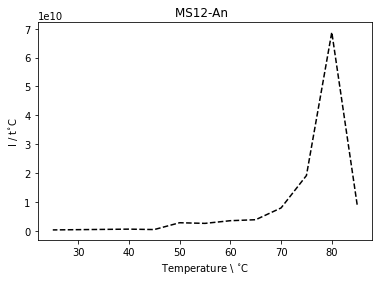

In [6]:
for c in df.columns[1:]:
    y = df[c]
    y = y*-1
    plt.plot(x[1:], np.diff(y.values), 'k--')
    plt.title('{}  '.format(c, popt[2], perr[2], popt[3]))
    plt.xlabel('Temperature \ $^{\circ}$C ')
    plt.ylabel('I / t$^{\circ}$C ')
    plt.show()